# ASSESSMENT BIG DATA

## Student number - 202170523

In [1]:
#importing necessary python libraries to enable analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

## Data Preparation and Cleaning

In [2]:
dataset = pd.read_csv('mhs.csv') #Original dataset
df = dataset.copy() #copy of the dataset which becomes the DataFrame

According to good practice, it is good to make a copy of the dataset and work with it.

In [3]:
df #viewing the dataframe

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
df.isna().sum() #checking for null values 

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
my_object_df = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects
my_object_df

,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk
...,...
1009,high risk
1010,high risk
1011,high risk
1012,high risk


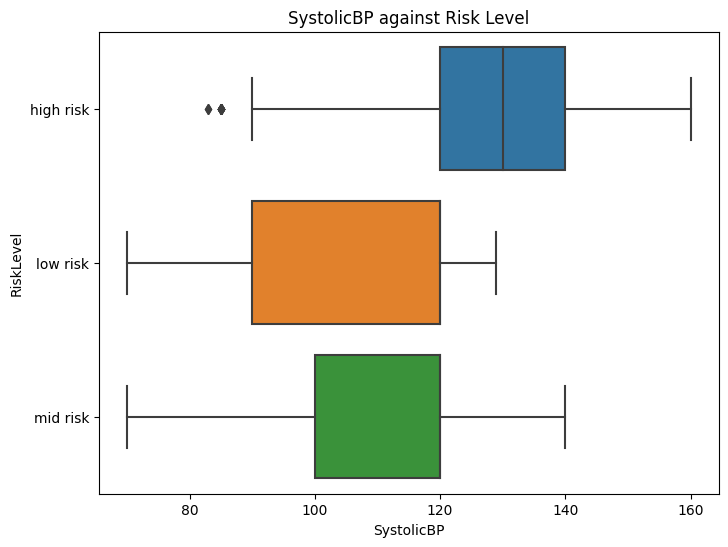

In [6]:
# boxplot of risk level against heartrate
plt.figure(figsize=(8, 6)) # setting the figure size
sns.boxplot(x='SystolicBP', y='RiskLevel', data=df) # box plot of SystolicBP versus RiskLevel
plt.title('SystolicBP against Risk Level') # setting the plot title
plt.show() # displaying the plot

The boxplot shows the distribution of the risklevel of the patients' Systolic BP readings.
Here, it shows that those who are between 120 to 140 mmHg are at a high risk
those between 90mmHg to 120 are low risk and 100 to 120mmHg are classified as mid risk level.

In [7]:
my_df_numeric = df.select_dtypes(exclude ='object') # obtains the numerical data type
my_df_numeric

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


A systolic BP that is greater than 140, and diastolic greater than 90 is considered high, the normal systolic BP ranges from 110 to 140, whilst the diastolic ranges between 70 to 90. Anything lower than the normal is considered low BP.

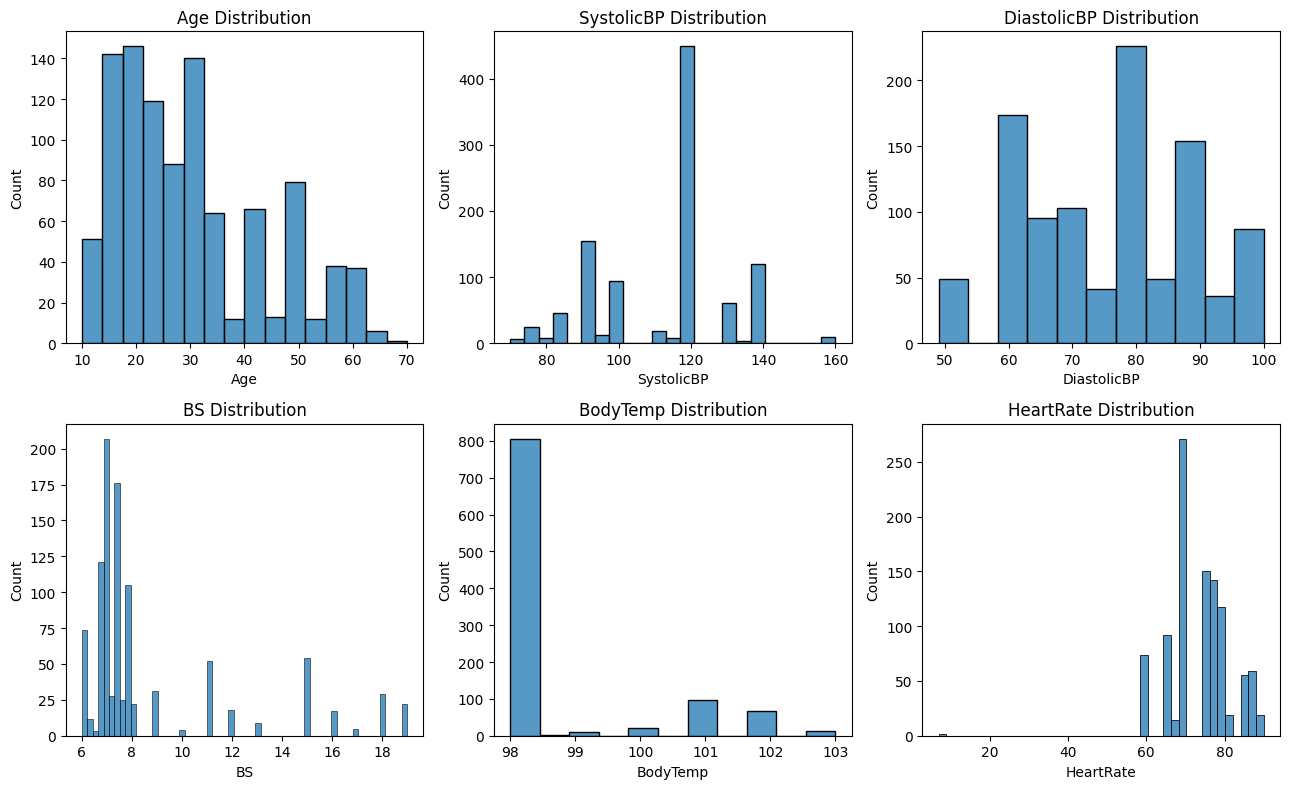

In [8]:
# plotting histograms of all the numerical variables

plt.figure(figsize = (13, 8)) # setting the plot size

for i, variable in enumerate(my_df_numeric): # iterating through the variables in the numerical dataframe
    plt.subplot(2, 3, i+1) # setting the layout rows and columns
    ax = sns.histplot(x = my_df_numeric[variable], data = my_df_numeric) # plotting the histograms
    plt.title(f'{variable} Distribution') # setting the title of the histograms
    plt.tight_layout()

Label encoding helps us convert categorical variables to numerical variables to include them during model training. 
The Risk Level variable is categorical whilst the other variables are continuous.

In [9]:
#label encoding the risk level column to enable training
le = LabelEncoder()
my_df = pd.DataFrame(df['RiskLevel'])
my_df_le = le.fit_transform(my_df)
my_df_le = pd.DataFrame(my_df_le)

C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
my_df_le

,0
0,0
1,0
2,0
3,0
4,1
...,...
1009,0
1010,0
1011,0
1012,0


In [11]:
df['RiskLevel'] = my_df_le

In [12]:
df #viewing the dataframe now to see the effected label encoding

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


In [13]:
df.describe()#viewing the statistical summary of the dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


The statistical summary showed that the minimum heartrate is 7bpm which is an anomaly. The heartrate of a human being cannot be 7bpm.
These records will be dropped

In [14]:
df[df['HeartRate']==7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,1
908,16,120,75,7.9,98.0,7,1


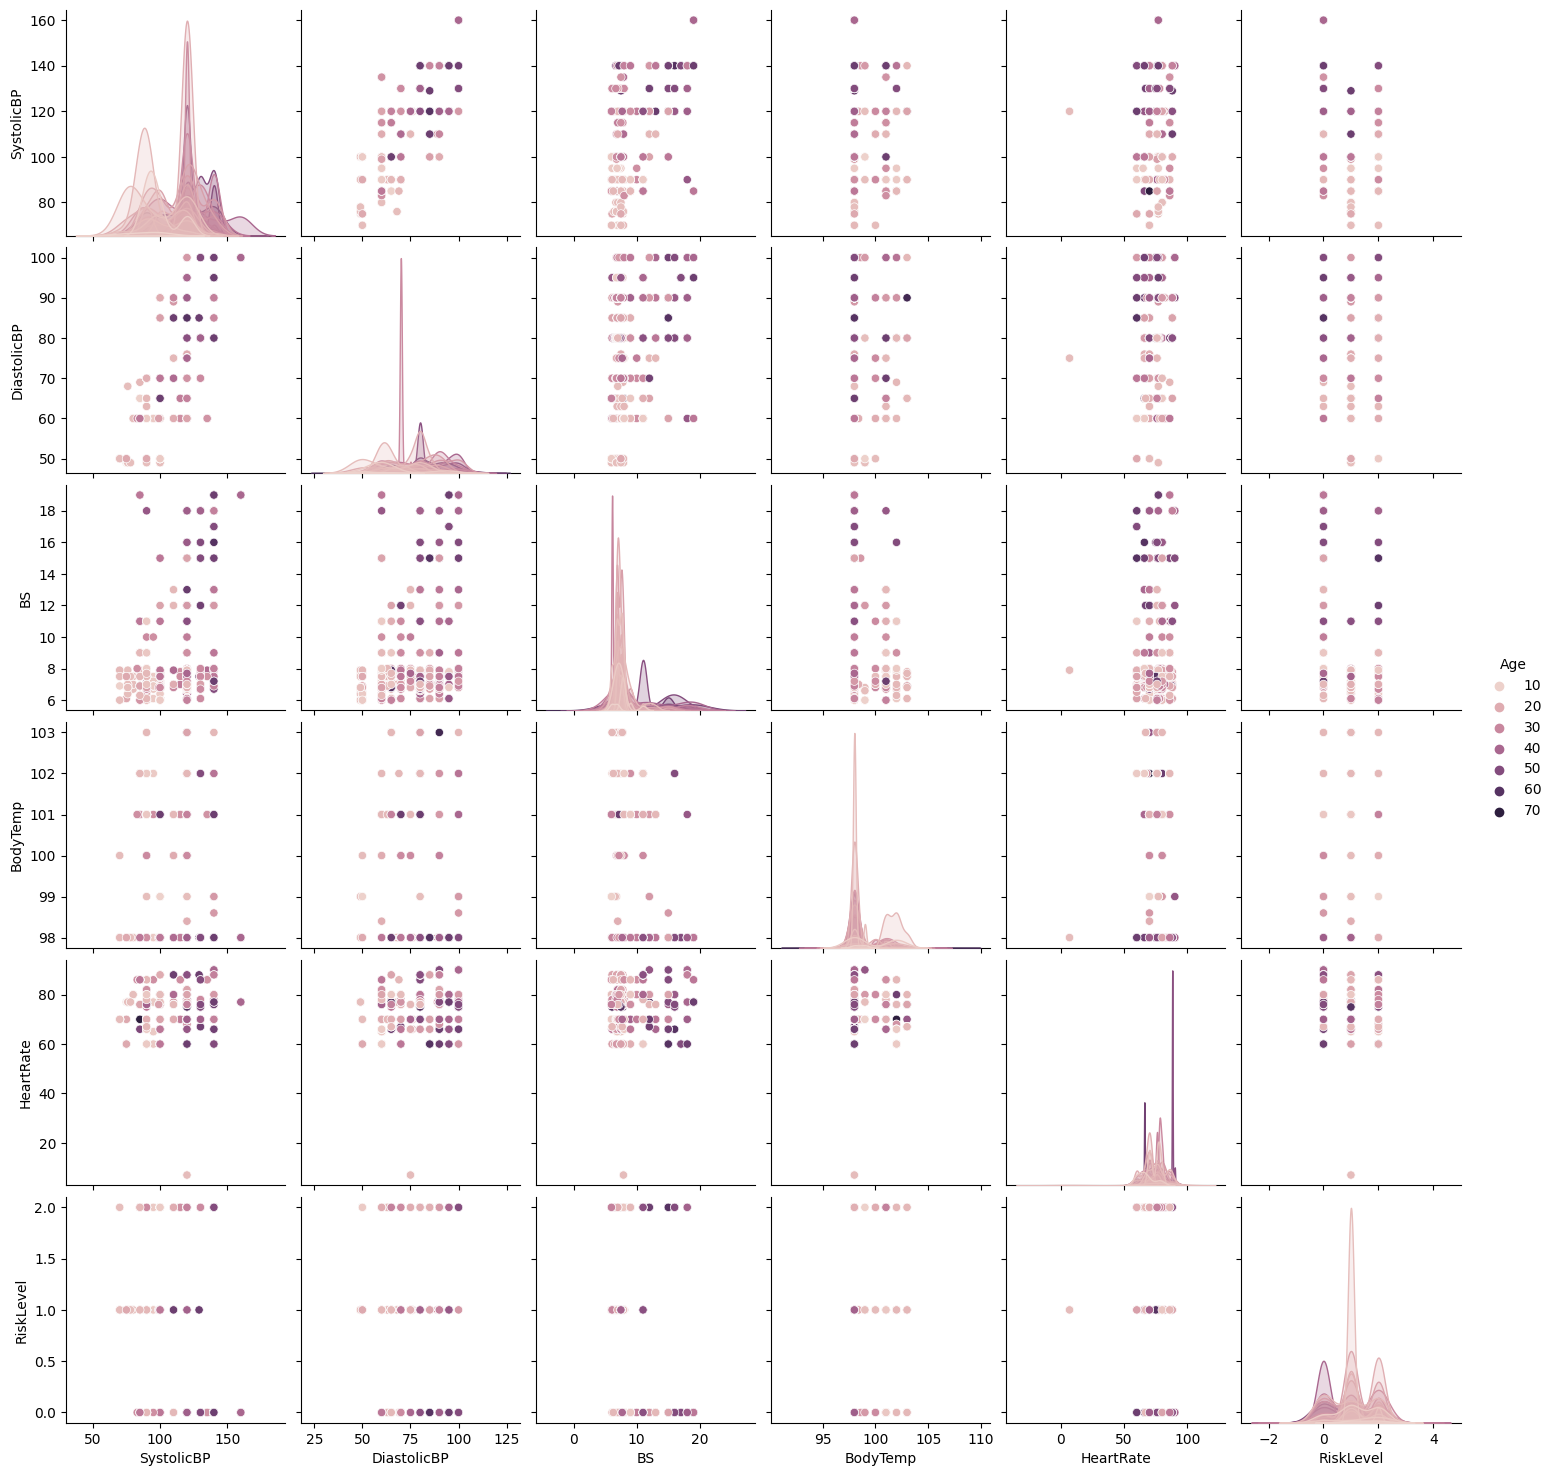

In [15]:
sns.pairplot(df, hue="Age")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 51.6 KB


In [17]:
df[df['HeartRate']< 27]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,1
908,16,120,75,7.9,98.0,7,1


In [18]:
df = df.drop(df[df['HeartRate']<27].index) #dropping the anomaly

In [19]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


## MODEL BUILDING - LINEAR REGRESSION MODEL

In [20]:
from sklearn.model_selection import train_test_split #importing the necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = df.drop('SystolicBP',axis=1) 
y = df['SystolicBP']  # defining only the tagret column

This will involve training the model with the Systolic BP as the target variable and the rest as the exploratory variables.

In [22]:
X

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,80,15.0,98.0,86,0
1,35,90,13.0,98.0,70,0
2,29,70,8.0,100.0,80,0
3,30,85,7.0,98.0,70,0
4,35,60,6.1,98.0,76,1
...,...,...,...,...,...,...
1009,22,60,15.0,98.0,80,0
1010,55,90,18.0,98.0,60,0
1011,35,60,19.0,98.0,86,0
1012,43,90,18.0,98.0,70,0


In [23]:
#scaling the features such that they are normally distributed with a mean of 0 and standard deviation of 1.

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
#split the data into training data and testing data. training size is made to be 80% and 20 to testing

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.8,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression # importing the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [27]:
lin_reg_model = linear_model.LinearRegression()
#svm_model = svm.SVR()

In [28]:
models = [('LR',lin_reg_model)]

In [29]:
# creating a function that parses the different models in fit predict and score
def model_report(models):
    model_score=[]
    for name, model in models:
        scores = (cross_val_score(model, X_train,y_train, cv=5, scoring='neg_root_mean_squared_error'))*-1
        cv1, cv2, cv3, cv4, cv5 = scores
        model_score.append((name,cv1, cv2, cv3, cv4, cv5,scores.mean()))
    return model_score

In [30]:
report = model_report(models)
report #list of scores

[('LR',
  11.360945181675143,
  11.03891887741624,
  11.330927381357995,
  11.086422226484892,
  10.398395121873774,
  11.04312175776161)]

In [31]:
reportDf = pd.DataFrame(report, columns=['Model', 'cv1 score', 'cv2 score', 'cv3 score', 'cv4 score', 'cv5 score','avg score'])
reportDf

,Model,cv1 score,cv2 score,cv3 score,cv4 score,cv5 score,avg score
0,LR,11.360945,11.038919,11.330927,11.086422,10.398395,11.043122


In [32]:
print(f"The average root mean squared error is {reportDf['avg score'][0]:.2f}")

The average root mean squared error is 11.04


# Feature Selection

In [33]:
correlation = df.corr()
correlation #checking the correlation of the variables to SystolicBP

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.417292,0.398234,0.473299,-0.256640,0.067727,-0.212242
SystolicBP,0.417292,1.000000,0.787198,0.425439,-0.286366,-0.018328,-0.208767
DiastolicBP,0.398234,0.787198,1.000000,0.423803,-0.257702,-0.051542,-0.284656
BS,0.473299,0.425439,0.423803,1.000000,-0.103765,0.149351,-0.480032
BodyTemp,-0.256640,-0.286366,-0.257702,-0.103765,1.000000,0.097749,-0.006760
HeartRate,0.067727,-0.018328,-0.051542,0.149351,0.097749,1.000000,-0.121618
RiskLevel,-0.212242,-0.208767,-0.284656,-0.480032,-0.006760,-0.121618,1.000000


<AxesSubplot:>

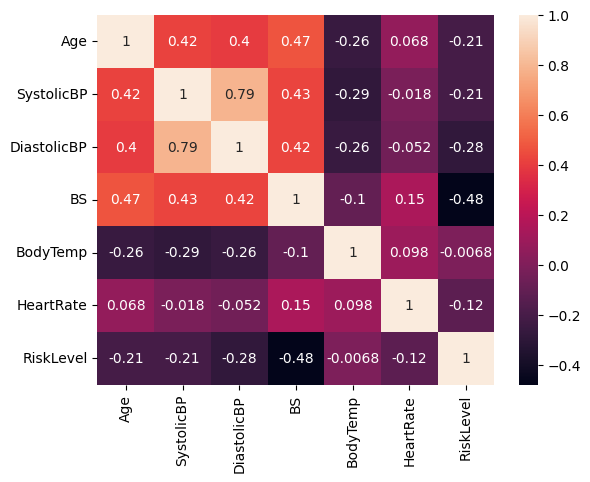

In [34]:
plt.figure(dpi=100)
sns.heatmap(correlation, annot = True)

From the heatmap drawn from the correlation function, Age, Diastolic BP and Blood Sugar showed correlation to the target variable.

In [35]:
X1 = df.drop(['SystolicBP','HeartRate', 'BodyTemp', 'RiskLevel'],axis=1) #dropping the variables that didn't correlate
y = df['SystolicBP']  # defining only the tagret column

In [36]:
X1

,Age,DiastolicBP,BS
0,25,80,15.0
1,35,90,13.0
2,29,70,8.0
3,30,85,7.0
4,35,60,6.1
...,...,...,...
1009,22,60,15.0
1010,55,90,18.0
1011,35,60,19.0
1012,43,90,18.0


In [37]:
#scaling the features such that they are normally distributed with a mean of 0 and standard deviation of 1.

scaler=StandardScaler()
X1_scaled=scaler.fit_transform(X1)

In [38]:
#split the data into training data and testing data. training size is made to be 80% and 20 to testing

X1_train,X1_test,y_train,y_test=train_test_split(X1_scaled,y,train_size=0.8,random_state=42)

In [39]:
lin_reg_model_ = linear_model.LinearRegression()

In [40]:
models_ = [('LR',lin_reg_model_)]

In [41]:
# creating a function that parses the different models in fit predict and score
#applying cross validation to the model
def model_report_2(models_):
    model_score1=[]
    for name, model in models_:
        scores1 = (cross_val_score(model, X1_train,y_train, cv=5, scoring='neg_root_mean_squared_error'))*-1
        cv1, cv2, cv3, cv4, cv5 = scores1
        model_score1.append((name,cv1, cv2, cv3, cv4, cv5,scores1.mean()))
    return model_score1

In [42]:
report2 = model_report_2(models_)
report2 #list of scores

[('LR',
  11.373658774943939,
  11.23949213925301,
  11.119108591482961,
  11.126170239077885,
  10.61612580373662,
  11.094911109698884)]

In [43]:
reportDf2 = pd.DataFrame(report2, columns=['Model', 'cv1 score', 'cv2 score', 'cv3 score', 'cv4 score', 'cv5 score','avg score'])
reportDf2

,Model,cv1 score,cv2 score,cv3 score,cv4 score,cv5 score,avg score
0,LR,11.373659,11.239492,11.119109,11.12617,10.616126,11.094911


In [44]:
reportDf2['avg score'][0]

11.094911109698884

In [45]:
print(f"The average root mean squared error is {reportDf2['avg score'][0]:.2f}")

The average root mean squared error is 11.09


# PRINCIPAL COMPONENT ANALYSIS

The task is to use PCA to reduce the number of variables to improve the model and get a better prediction.

In [46]:
from sklearn.decomposition import PCA

In [47]:
X_scaled #scaling the exploratory variables and not the entire dataset

array([[-0.36379635,  0.25456618,  1.90363273, -0.48580776,  1.53830836,
        -1.37632373],
       [ 0.37876497,  0.97437889,  1.2966439 , -0.48580776, -0.58987764,
        -1.37632373],
       [-0.06677182, -0.46524654, -0.22082817,  0.9721918 ,  0.74023861,
        -1.37632373],
       ...,
       [ 0.37876497, -1.18505925,  3.11761038, -0.48580776,  1.53830836,
        -1.37632373],
       [ 0.97281403,  0.97437889,  2.81411597, -0.48580776, -0.58987764,
        -1.37632373],
       [ 0.15599658, -0.8251529 , -0.827817  ,  1.70119157,  0.20819211,
         1.21259749]])

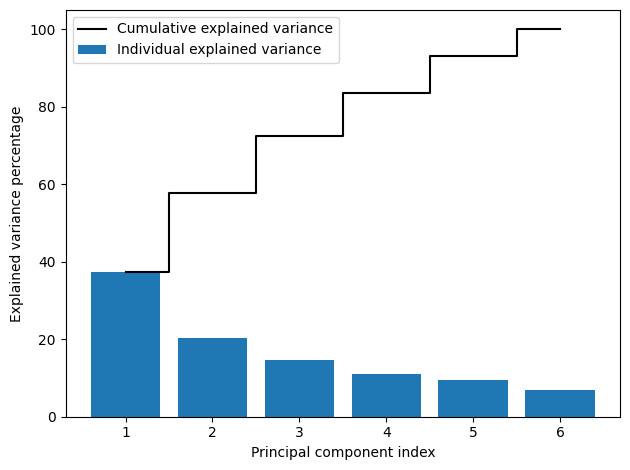

In [48]:
pca = PCA(n_components=None)
pca.fit(X_scaled)
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1, 7), exp_var, label='Individual explained variance')
plt.step(range(1, 7), cum_exp_var, where='mid', label='Cumulative explained variance', color='black')
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6])
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("PCAplot.png")
plt.show()

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4) # specify the number of principled components
x_pca = pca.fit_transform(X_scaled) # fit the model and transform the data to their new shape
# per new dimension, see what % of variation in the dataset it accounts for...
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print("percent_variance=", percent_variance)

percent_variance= [37.31 20.38 14.72 11.08]


In [50]:
x_pca

array([[ 1.80548427,  1.54219118, -0.44855135, -1.21545732],
       [ 1.98596875, -0.15955429,  0.96123953, -0.53647657],
       [ 0.02979814,  1.6286968 ,  0.39734156, -0.37658526],
       ...,
       [ 2.13120315,  2.01743897, -0.72389016, -0.78490194],
       [ 3.09867939,  0.06826922,  0.96493435, -0.04137956],
       [-1.65550589,  0.71247261, -0.13195224,  1.56599692]])

In [51]:
#Build model using PCA
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,train_size=0.8,random_state=46)

In [52]:
pca_lin_reg_model = linear_model.LinearRegression()

In [53]:
pca_models = [('LR',pca_lin_reg_model)]

In [54]:
def model_report_3(pca_models):
    model_score2=[]
    for name, model in pca_models:
        #model.fit(X_train,y_train)
        #preds = model.predict(X_test)
        #score = root_mean_squared_error(y_test,preds)
        scores3 = (cross_val_score(model, x_pca_train,y_train, cv=5, scoring='neg_root_mean_squared_error'))*-1
        cv1, cv2, cv3, cv4, cv5 = scores3
        model_score2.append((name,cv1, cv2, cv3, cv4, cv5,scores3.mean()))
    return model_score2

In [55]:
report3 = model_report_3(pca_models)
report3 #list of scores

[('LR',
  13.524255185537838,
  12.848455439280045,
  13.565122491585948,
  13.305294396767243,
  12.97276158207265,
  13.243177819048745)]

In [56]:
reportDf3 = pd.DataFrame(report3, columns=['Model', 'cv1 score', 'cv2 score', 'cv3 score', 'cv4 score', 'cv5 score','avg score'])
reportDf3

,Model,cv1 score,cv2 score,cv3 score,cv4 score,cv5 score,avg score
0,LR,13.524255,12.848455,13.565122,13.305294,12.972762,13.243178


In [57]:
print(f"The average root mean squared error is {reportDf3['avg score'][0]:.2f}")

The average root mean squared error is 13.24


# RELATIONSHIP BETWEEN AGE AND MEAN HEARTRATE

 The task is to investigate the relationship between age and heartrate  by means of age grouping. I used a function to categorise the ages according to the NHS' age categories which was referenced in the report. Then found the mean heartrates of those categories and then visualised it with a plot

In [58]:
def agegroup(age): #defining the agegroup according to medical age categories
    if age < 13:
        return '0 - 12'
    elif age < 20:
        return '13 - 19'
    elif age < 40:
        return '20 - 39'
    elif age < 65:
        return '40 - 64'
    elif age < 90:
        return '65 - 89'
    else:
        return '90+'

In [59]:
df['AgeGroup'] = df['Age'].apply(agegroup) #applying the age categories to the dataframe

In [60]:
heartrate_by_age = df.groupby('AgeGroup')['HeartRate'].mean()
heartrate_by_age #grouping age by mean of the heartrate

AgeGroup
0 - 12     67.205128
13 - 19    73.865546
20 - 39    74.997930
40 - 64    74.959514
65 - 89    77.600000
Name: HeartRate, dtype: float64

In [61]:
# Defining the ordered list of AgeGroup labels
ordered_agegroups = ['0 - 12', '13 - 19', '20 - 39', '40 - 64', '65 - 89']

# Computing the mean heart rate by AgeGroup and reindex the resulting series with the ordered AgeGroup labels
heartrate_by_age = df.groupby('AgeGroup')['HeartRate'].mean().reindex(ordered_agegroups)

# Displaying the resulting series
print(heartrate_by_age)


AgeGroup
0 - 12     67.205128
13 - 19    73.865546
20 - 39    74.997930
40 - 64    74.959514
65 - 89    77.600000
Name: HeartRate, dtype: float64


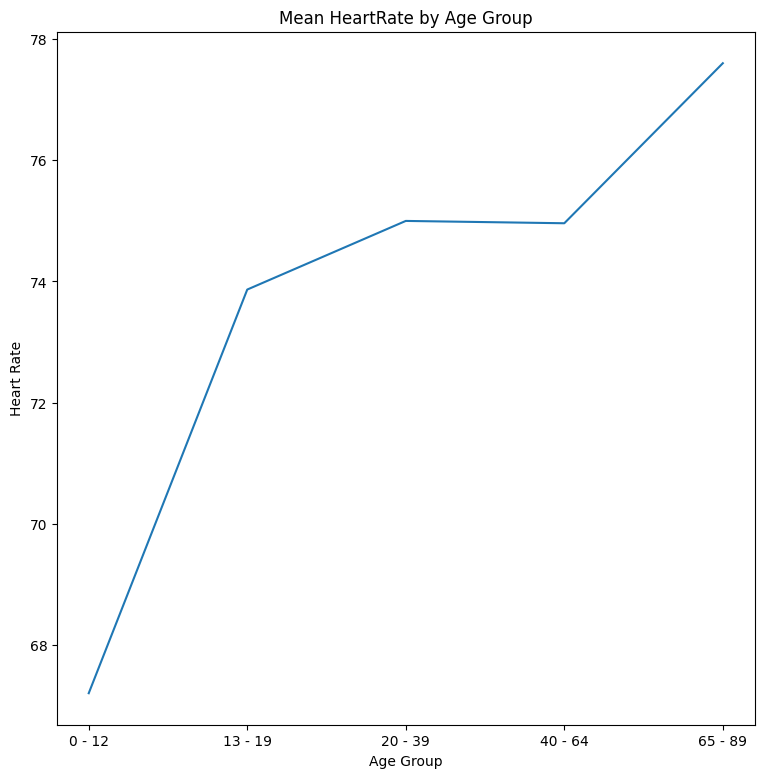

In [62]:
plt.figure(dpi=100,figsize=(9, 9))
plt.plot(heartrate_by_age)
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.title('Mean HeartRate by Age Group')
plt.show()

# ASSOCIATION PATTERN MINING

Blood pressure is recorded with 2 numbers: the systolic pressure and diastolic blood pressure. Assuming, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.

The associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure is derived.  
Here we calculate the following:
(1)    Support
(2)    Confidence
(3)    Conviction
(4)    Lift

Interpretation is given in the report

This function categorises the systolic band into high, normal and low

In [63]:
def systolic_band(band):
    if band >= 140:
        return 'High Systolic'
    elif band < 110:
        return 'Low Systolic'
    else:
        return 'Normal Systolic'

    
def diastolic_band(band):
    if band >= 90:
        return 'High Diastolic'
    elif band < 70:
        return 'Low Diastolic'
    else:
        return 'Normal Diastolic'
    

    
df['Systolicband'] = df['SystolicBP'].apply(systolic_band)
df['Diastolicband'] = df['DiastolicBP'].apply(diastolic_band)
df.describe(include=object)

,AgeGroup,Systolicband,Diastolicband
count,1012,1012,1012
unique,5,3,3
top,20 - 39,Normal Systolic,Normal Diastolic
freq,483,538,415


In [64]:
from mlxtend.frequent_patterns import apriori,association_rules #importing the library

In [65]:
df_AR = pd.DataFrame(df, columns =['Systolicband','Diastolicband']) #creating the association rule dataframe

In [66]:
df_AR = pd.get_dummies(df_AR,prefix=['Systolicband','Diastolicband'], columns = ['Systolicband','Diastolicband'])

In [67]:
df_AR.head()

,Systolicband_High Systolic,Systolicband_Low Systolic,Systolicband_Normal Systolic,Diastolicband_High Diastolic,Diastolicband_Low Diastolic,Diastolicband_Normal Diastolic
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0


In [68]:
freq_itemset = apriori(df_AR, min_support=0.0001, use_colnames=True)
freq_itemset

C:\Users\Dell_Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128458,(Systolicband_High Systolic)
1,0.339921,(Systolicband_Low Systolic)
2,0.531621,(Systolicband_Normal Systolic)
3,0.272727,(Diastolicband_High Diastolic)
4,0.317194,(Diastolicband_Low Diastolic)
5,0.410079,(Diastolicband_Normal Diastolic)
6,0.115613,"(Systolicband_High Systolic, Diastolicband_Hig..."
7,0.012846,"(Diastolicband_Normal Diastolic, Systolicband_..."
8,0.009881,"(Systolicband_Low Systolic, Diastolicband_High..."
9,0.266798,"(Diastolicband_Low Diastolic, Systolicband_Low..."


the minimum support threshold that defines the minimum frequency required for an itemset to be considered "frequent". This threshold is specified as a fraction between 0 and 1. In this case, a minimum support threshold of 0.0001 has been specified, which means that itemsets that appear in at least 0.01% of the transactions will be considered frequent.
The column names ar returned instead of the indices.

In [69]:
rules = association_rules(freq_itemset, metric='confidence', min_threshold=0) #generating the association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Systolicband_High Systolic),(Diastolicband_High Diastolic),0.128458,0.272727,0.115613,0.900000,3.300000,0.080579,7.272727
1,(Diastolicband_High Diastolic),(Systolicband_High Systolic),0.272727,0.128458,0.115613,0.423913,3.300000,0.080579,1.512864
2,(Diastolicband_Normal Diastolic),(Systolicband_High Systolic),0.410079,0.128458,0.012846,0.031325,0.243855,-0.039832,0.899726
3,(Systolicband_High Systolic),(Diastolicband_Normal Diastolic),0.128458,0.410079,0.012846,0.100000,0.243855,-0.039832,0.655468
4,(Systolicband_Low Systolic),(Diastolicband_High Diastolic),0.339921,0.272727,0.009881,0.029070,0.106589,-0.082824,0.749047
5,(Diastolicband_High Diastolic),(Systolicband_Low Systolic),0.272727,0.339921,0.009881,0.036232,0.106589,-0.082824,0.684894
6,(Diastolicband_Low Diastolic),(Systolicband_Low Systolic),0.317194,0.339921,0.266798,0.841121,2.474462,0.158978,4.154615
7,(Systolicband_Low Systolic),(Diastolicband_Low Diastolic),0.339921,0.317194,0.266798,0.784884,2.474462,0.158978,3.174127
8,(Systolicband_Low Systolic),(Diastolicband_Normal Diastolic),0.339921,0.410079,0.063241,0.186047,0.453685,-0.076153,0.724760
9,(Diastolicband_Normal Diastolic),(Systolicband_Low Systolic),0.410079,0.339921,0.063241,0.154217,0.453685,-0.076153,0.780435


The metric used in above code was confidence because it measures the conditional probability of the consequent given the antecedent. It is the more common metric used.
The threshold was set to zero to consider all the possible association rules without leaving anything out.

In [70]:
rulesdf = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction'])
rulesdf #selecting the important association rules and fixing them in a DataFrame

,antecedents,consequents,support,confidence,lift,conviction
0,(Systolicband_High Systolic),(Diastolicband_High Diastolic),0.115613,0.900000,3.300000,7.272727
1,(Diastolicband_High Diastolic),(Systolicband_High Systolic),0.115613,0.423913,3.300000,1.512864
2,(Diastolicband_Normal Diastolic),(Systolicband_High Systolic),0.012846,0.031325,0.243855,0.899726
3,(Systolicband_High Systolic),(Diastolicband_Normal Diastolic),0.012846,0.100000,0.243855,0.655468
4,(Systolicband_Low Systolic),(Diastolicband_High Diastolic),0.009881,0.029070,0.106589,0.749047
5,(Diastolicband_High Diastolic),(Systolicband_Low Systolic),0.009881,0.036232,0.106589,0.684894
6,(Diastolicband_Low Diastolic),(Systolicband_Low Systolic),0.266798,0.841121,2.474462,4.154615
7,(Systolicband_Low Systolic),(Diastolicband_Low Diastolic),0.266798,0.784884,2.474462,3.174127
8,(Systolicband_Low Systolic),(Diastolicband_Normal Diastolic),0.063241,0.186047,0.453685,0.724760
9,(Diastolicband_Normal Diastolic),(Systolicband_Low Systolic),0.063241,0.154217,0.453685,0.780435


# CLUSTERING - SYSTOLIC BP

The task is to find clusters of patients with similar systolic BP

In [71]:
x = np.array(df['SystolicBP'])#creating a numpy array of the systolicBP variable
x = x.reshape(-1,1) #reshaping

In [72]:
from sklearn.cluster import KMeans # import KMeans 
#perfoming K-means clustering to select the optimal number of clusters for the dataset based on the similarity of the data points
Sum_of_squared_distances = []
K = range(1,13)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

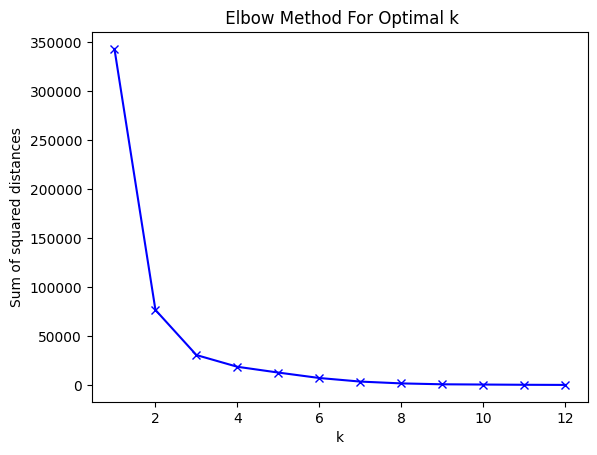

In [73]:
#plotting the elbow to obtain k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title(' Elbow Method For Optimal k')
plt.show()

In [74]:
model = KMeans(n_clusters = 3) # Specifying the number of clusters
cluster_labels = model.fit_predict(x) #fitting to predict
cluster_labels

array([2, 2, 0, ..., 0, 1, 1])

In [75]:
df['CLUSTERS'] = cluster_labels #applying the clusters to the dataframe

In [76]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup,Systolicband,Diastolicband,CLUSTERS
0,25,130,80,15.0,98.0,86,0,20 - 39,Normal Systolic,Normal Diastolic,2
1,35,140,90,13.0,98.0,70,0,20 - 39,High Systolic,High Diastolic,2
2,29,90,70,8.0,100.0,80,0,20 - 39,Low Systolic,Normal Diastolic,0
3,30,140,85,7.0,98.0,70,0,20 - 39,High Systolic,Normal Diastolic,2
4,35,120,60,6.1,98.0,76,1,20 - 39,Normal Systolic,Low Diastolic,1
...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0,20 - 39,Normal Systolic,Low Diastolic,1
1010,55,120,90,18.0,98.0,60,0,40 - 64,Normal Systolic,High Diastolic,1
1011,35,85,60,19.0,98.0,86,0,20 - 39,Low Systolic,Low Diastolic,0
1012,43,120,90,18.0,98.0,70,0,40 - 64,Normal Systolic,High Diastolic,1


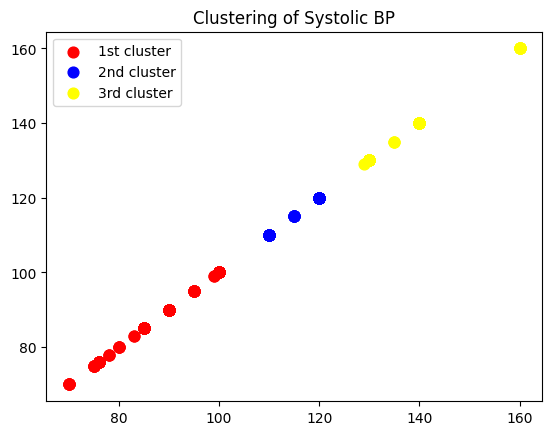

In [77]:
# Visualizing the clusters
plt.scatter(x[cluster_labels == 0, 0], x[cluster_labels == 0, 0], s = 60, c = 'red', label = '1st cluster')
plt.scatter(x[cluster_labels == 1, 0], x[cluster_labels == 1, 0], s = 60, c = 'blue', label = '2nd cluster')
plt.scatter(x[cluster_labels == 2, 0], x[cluster_labels == 2, 0], s = 60, c = 'yellow', label = '3rd cluster')
plt.legend()
plt.title('Clustering of Systolic BP')
plt.savefig('clustering.png')
plt.show()

In [78]:
my_df_numeric = df.select_dtypes(exclude ='object') # obtains the numerical data type
my_df_numeric

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,CLUSTERS
0,25,130,80,15.0,98.0,86,0,2
1,35,140,90,13.0,98.0,70,0,2
2,29,90,70,8.0,100.0,80,0,0
3,30,140,85,7.0,98.0,70,0,2
4,35,120,60,6.1,98.0,76,1,1
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0,1
1010,55,120,90,18.0,98.0,60,0,1
1011,35,85,60,19.0,98.0,86,0,0
1012,43,120,90,18.0,98.0,70,0,1


Here, I aslo tried clustering the patients according to their age and systolic BP.

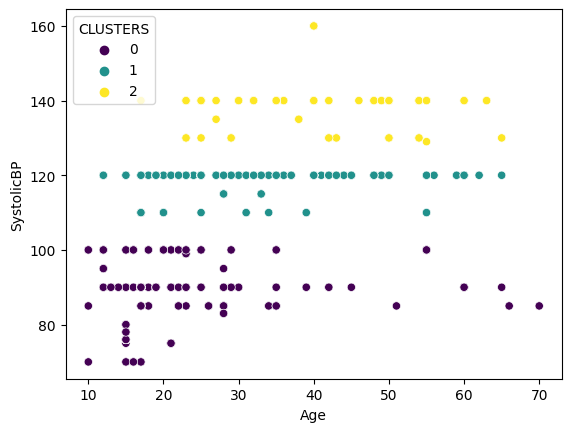

In [85]:
sns.scatterplot(data = my_df_numeric, x = 'Age', y = 'SystolicBP', hue = 'CLUSTERS', palette = 'viridis');

In [80]:
new_df = my_df_numeric.drop(['CLUSTERS'], axis = 1)
new_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


# CORRELATION BETWEEN AGE AND SYSTOLIC BP

The task is to determine the correlation between the age and systolic BP variables. Pearson Correlation coefficient was implemented for this task.

In [81]:
age_corr = df[['Age', 'SystolicBP']].corr()
age_corr

,Age,SystolicBP
Age,1.000000,0.417292
SystolicBP,0.417292,1.000000


In [82]:
values = pearsonr(df['Age'], df['SystolicBP']) #applying pearsonr
corr = values [0]
pvalue = values [1]

print('', corr)
print('The pvalue is given as :', pvalue)

 0.4172921436670312
The pvalue is given as : 6.559904051449056e-44


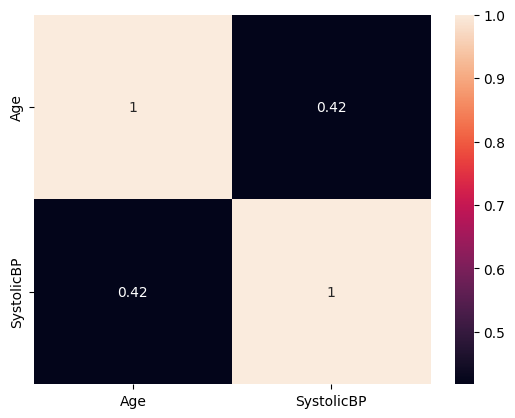

In [84]:
plt.figure(dpi=100)
sns.heatmap(age_corr, annot = True); #heatmap of the correlation between age and systolicBP